In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files und[er the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv
/kaggle/input/crime-cast-forecasting-crime-categories/train.csv
/kaggle/input/crime-cast-forecasting-crime-categories/test.csv


In [2]:
pd.set_option("display.max_columns", 100)

# Dummy  Classifier

In [3]:
# from sklearn.model_selection import train_test_split

# train_df = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/train.csv')
# # train_df.head()

# X = train_df.drop('Crime_Category', axis = 'columns')
# y = train_df['Crime_Category']

# # y.head()

# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

# from sklearn.preprocessing import LabelEncoder

# from sklearn.dummy import DummyClassifier

# model = DummyClassifier(strategy = 'most_frequent')
# model.fit(X_train, y_train)

# # model.predict(X_val.iloc[0 : 1])

# # X_val.iloc[0:1]

# sample = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv')
# # sample.head()

# X_test = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/test.csv')
# # print(X_test.head())
# y_pred = model.predict(X_test)

# # X_test.shape

# submission = pd.DataFrame({"ID": np.arange(1, 5001),
#                              "Crime_Category": y_pred,
#                           }
#                          )
# submission.to_csv('submission.csv', index=False)

# from sklearn.model_selection import cross_val_score

# # Example with cross_val_score
# # model = DummyClassifier(strategy='most_frequent')
# # scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
# # print("Cross-validation scores:", scores)
# # print("Average cross-validation score:", scores.mean())

# y_pred


# Importing required libraries


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
import scipy.stats as ss

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import mean_squared_error, accuracy_score,precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, MultiLabelBinarizer, LabelEncoder, MinMaxScaler, FunctionTransformer, LabelBinarizer
from sklearn.feature_selection import SelectKBest, chi2, SelectPercentile, f_classif, SelectFromModel, f_regression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.ensemble import RandomForestClassifier


# Loading data


In [5]:
df = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/train.csv")
test_df = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/test.csv")

# EDA

In [6]:
df.head()


,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,1.0,0385,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,1.0,0906 0352 0371 0446 1822 0344 0416 0417,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,2.0,0329 1202,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,1.0,0329 1300,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,1.0,0416 0945 1822 0400 0417 0344,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

In [8]:
# Convert to datetime format
df['Date_Reported'] = pd.to_datetime(df['Date_Reported'])
df['Date_Occurred'] = pd.to_datetime(df['Date_Occurred'])

# Extract year, month, day, and hour
df['Year_Reported'] = df['Date_Reported'].dt.year
df['Month_Reported'] = df['Date_Reported'].dt.month
df['Day_Reported'] = df['Date_Reported'].dt.day

df['Year_Occurred'] = df['Date_Occurred'].dt.year
df['Month_Occurred'] = df['Date_Occurred'].dt.month
df['Day_Occurred'] = df['Date_Occurred'].dt.day

df['Hour_Occurred'] = df['Time_Occurred'].fillna(0).astype(int) // 100
df['Minute_Occurred'] = df['Time_Occurred'].fillna(0).astype(int)  - (df['Time_Occurred'].fillna(0).astype(int) // 100)*100

df.drop(columns=['Time_Occurred','Date_Reported','Date_Occurred','Cross_Street','Weapon_Used_Code','Weapon_Description'],inplace=True)

df.head()

/tmp/ipykernel_18/4251893934.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date_Reported'] = pd.to_datetime(df['Date_Reported'])
/tmp/ipykernel_18/4251893934.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date_Occurred'] = pd.to_datetime(df['Date_Occurred'])


,Location,Latitude,Longitude,Area_ID,Area_Name,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Status,Status_Description,Crime_Category,Year_Reported,Month_Reported,Day_Reported,Year_Occurred,Month_Occurred,Day_Occurred,Hour_Occurred,Minute_Occurred
0,4500 CARPENTER AV,34.1522,-118.3910,15.0,N Hollywood,1563.0,1.0,0385,75.0,M,W,101.0,STREET,IC,Invest Cont,Property Crimes,2020,3,9,2020,3,6,18,0
1,45TH ST,34.0028,-118.2391,13.0,Newton,1367.0,1.0,0906 0352 0371 0446 1822 0344 0416 0417,41.0,M,H,216.0,SWAP MEET,IC,Invest Cont,Property Crimes,2020,2,27,2020,2,27,13,45
2,600 E MARTIN LUTHER KING JR BL,34.0111,-118.2653,13.0,Newton,1343.0,2.0,0329 1202,67.0,M,B,501.0,SINGLE FAMILY DWELLING,IC,Invest Cont,Property Crimes,2020,8,21,2020,8,21,6,5
3,14900 ORO GRANDE ST,34.2953,-118.4590,19.0,Mission,1924.0,1.0,0329 1300,61.0,M,H,101.0,STREET,IC,Invest Cont,Property Crimes,2020,11,8,2020,11,6,18,0
4,7100 S VERMONT AV,33.9787,-118.2918,12.0,77th Street,1245.0,1.0,0416 0945 1822 0400 0417 0344,0.0,X,X,401.0,MINI-MART,IC,Invest Cont,Property Crimes,2020,2,25,2020,2,25,11,30


In [9]:

# Define preprocessing function
def preprocess_modus_operandi(df, mlb=None, imputer=None):
    # Fill NaN values with an empty string
    df['Modus_Operandi'] = df['Modus_Operandi'].fillna('')
    # Split strings into lists
    df['Modus_Operandi'] = df['Modus_Operandi'].apply(lambda y: y.split() if y else [])

    # Initialize MultiLabelBinarizer if not provided
    if mlb is None:
        mlb = MultiLabelBinarizer()
    # Fit and transform MultiLabelBinarizer on Modus_Operandi
    binary_matrix = mlb.fit_transform(df['Modus_Operandi'])

    # Initialize KNNImputer if not provided
    if imputer is None:
        imputer = KNNImputer(n_neighbors=6)
    # Fit and transform KNNImputer on binary_matrix
    binary_matrix_imputed = imputer.fit_transform(binary_matrix)

    # Convert binary matrix back to DataFrame with original columns
    binary_df = pd.DataFrame(binary_matrix_imputed, columns=mlb.classes_)
    # Concatenate binary matrix with original DataFrame
    df = pd.concat([df.drop(columns=['Modus_Operandi']), binary_df], axis=1)

    return df, mlb, imputer


In [10]:
cat_cols = df.select_dtypes(include="object").columns
cat_cols

#  Premise_Description [KNN], Weapon_Description [0 to fill NAN] or [knn] , Victim_Descent Victim_Sex Victim_Age [most freq]
#  Modus_Operandi [MultiLabel Binariser], Area name is fine


Index(['Location', 'Area_Name', 'Modus_Operandi', 'Victim_Sex',
       'Victim_Descent', 'Premise_Description', 'Status', 'Status_Description',
       'Crime_Category'],
      dtype='object')

In [11]:
num_cols = df.select_dtypes(exclude="object").columns
num_cols

Index(['Latitude', 'Longitude', 'Area_ID', 'Reporting_District_no', 'Part 1-2',
       'Victim_Age', 'Premise_Code', 'Year_Reported', 'Month_Reported',
       'Day_Reported', 'Year_Occurred', 'Month_Occurred', 'Day_Occurred',
       'Hour_Occurred', 'Minute_Occurred'],
      dtype='object')

In [12]:
cat_cols.nunique() + num_cols.nunique() 


24

In [13]:
df.count()

Location                 20000
Latitude                 20000
Longitude                20000
Area_ID                  20000
Area_Name                20000
Reporting_District_no    20000
Part 1-2                 20000
Modus_Operandi           17259
Victim_Age               20000
Victim_Sex               17376
Victim_Descent           17376
Premise_Code             20000
Premise_Description      19995
Status                   20000
Status_Description       20000
Crime_Category           20000
Year_Reported            20000
Month_Reported           20000
Day_Reported             20000
Year_Occurred            20000
Month_Occurred           20000
Day_Occurred             20000
Hour_Occurred            20000
Minute_Occurred          20000
dtype: int64

In [14]:
df[cat_cols].isnull().sum()

Location                  0
Area_Name                 0
Modus_Operandi         2741
Victim_Sex             2624
Victim_Descent         2624
Premise_Description       5
Status                    0
Status_Description        0
Crime_Category            0
dtype: int64

In [15]:
df[num_cols].isnull().sum().sum()

0

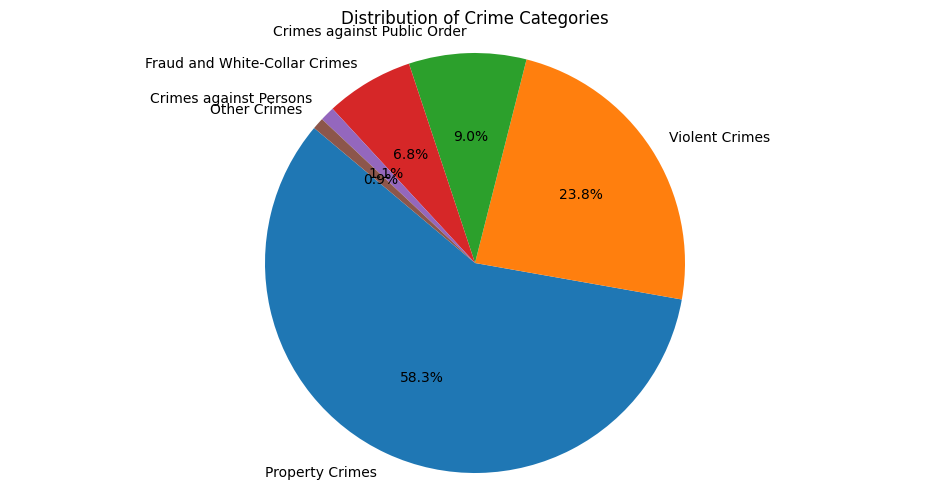

In [16]:
plt.figure(figsize=(12, 6))
plt.pie(df['Crime_Category'].value_counts(), labels=df['Crime_Category'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Crime Categories')
plt.axis('equal') 
plt.show()


"Property Crimes" is the most common type of crime.

The next most commmon type is "Violent Crimes".

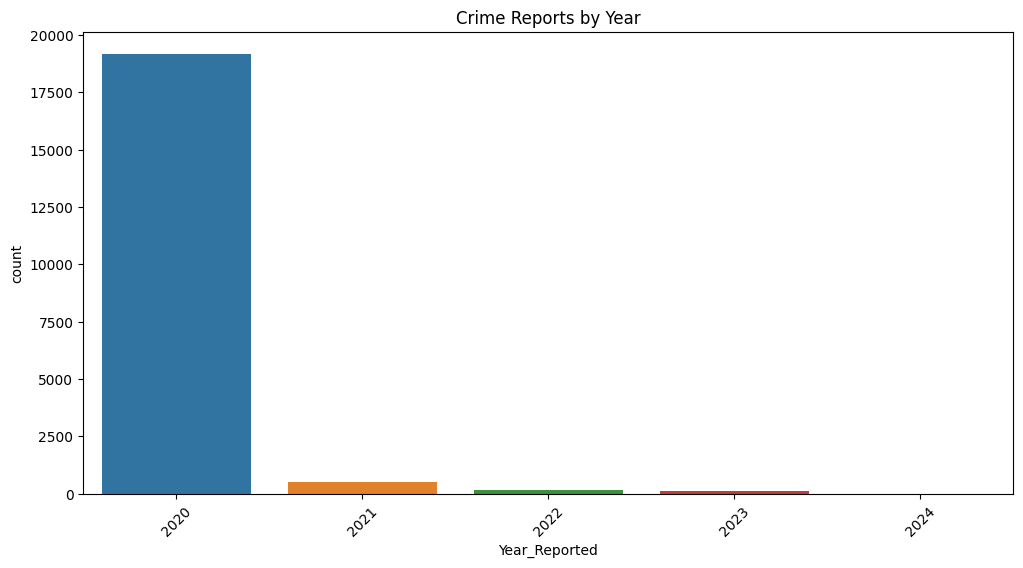

In [17]:
# Plot crime occurrences over the years
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Year_Reported')
plt.title('Crime Reports by Year')
plt.xticks(rotation=45)
plt.show()


Record high number of cases were reported in 2020.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


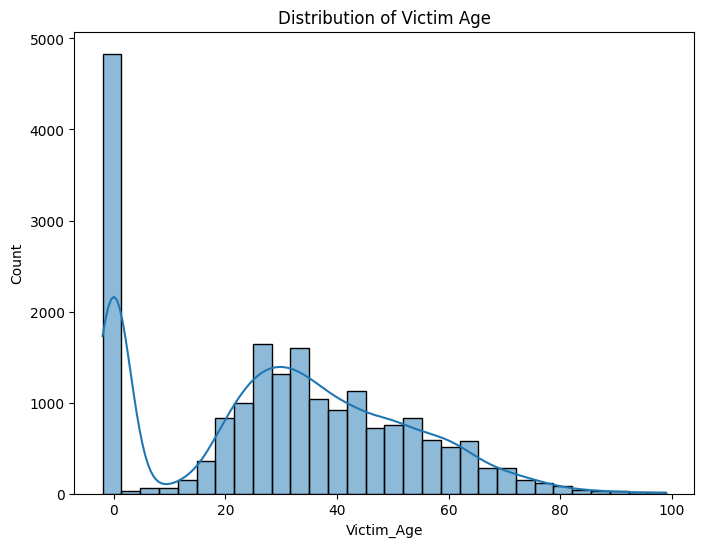

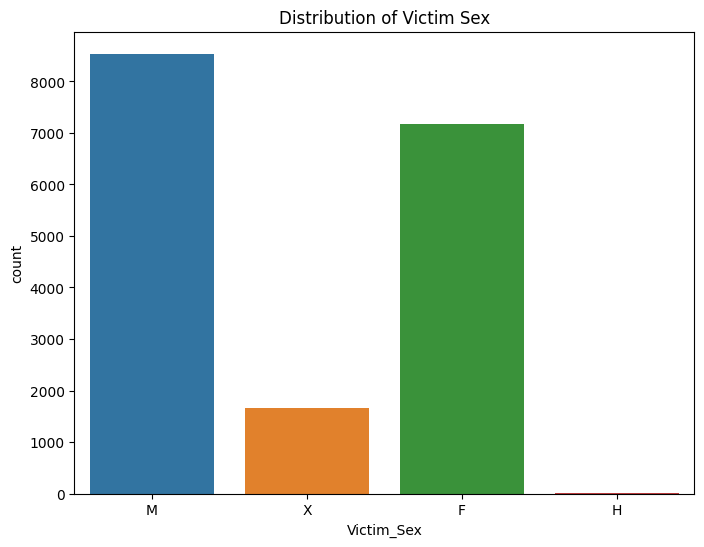

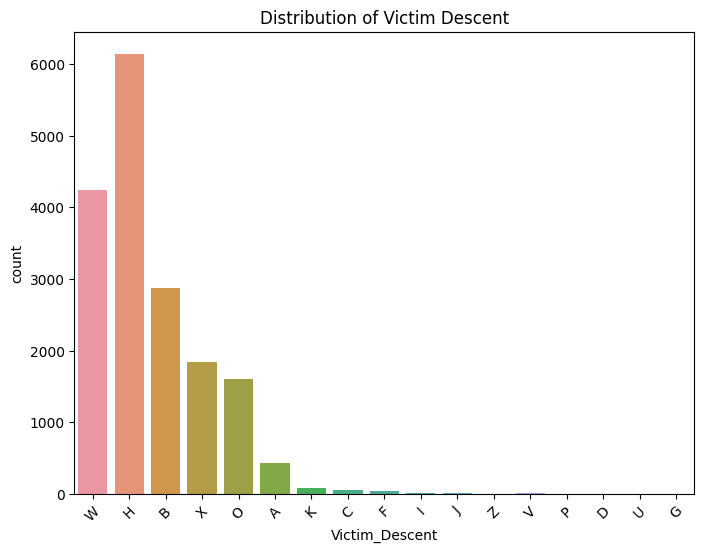

In [18]:
# Distribution of Victim Age
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Victim_Age', bins=30, kde=True)
plt.title('Distribution of Victim Age')
plt.show()

# Distribution of Victim Sex
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Victim_Sex')
plt.title('Distribution of Victim Sex')
plt.show()

# Distribution of Victim Descent
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Victim_Descent')
plt.title('Distribution of Victim Descent')
plt.xticks(rotation=45)
plt.show()


Males have been reported in crimes slightly more in frequency than Females, and we can see a significant increase in crime cases between the ages 20 and 40.

In [19]:
print(df.info())

print(df.describe())

print(df.describe(include=['object']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Latitude               20000 non-null  float64
 2   Longitude              20000 non-null  float64
 3   Area_ID                20000 non-null  float64
 4   Area_Name              20000 non-null  object 
 5   Reporting_District_no  20000 non-null  float64
 6   Part 1-2               20000 non-null  float64
 7   Modus_Operandi         17259 non-null  object 
 8   Victim_Age             20000 non-null  float64
 9   Victim_Sex             17376 non-null  object 
 10  Victim_Descent         17376 non-null  object 
 11  Premise_Code           20000 non-null  float64
 12  Premise_Description    19995 non-null  object 
 13  Status                 20000 non-null  object 
 14  Status_Description     20000 non-null  object 
 15  Cr

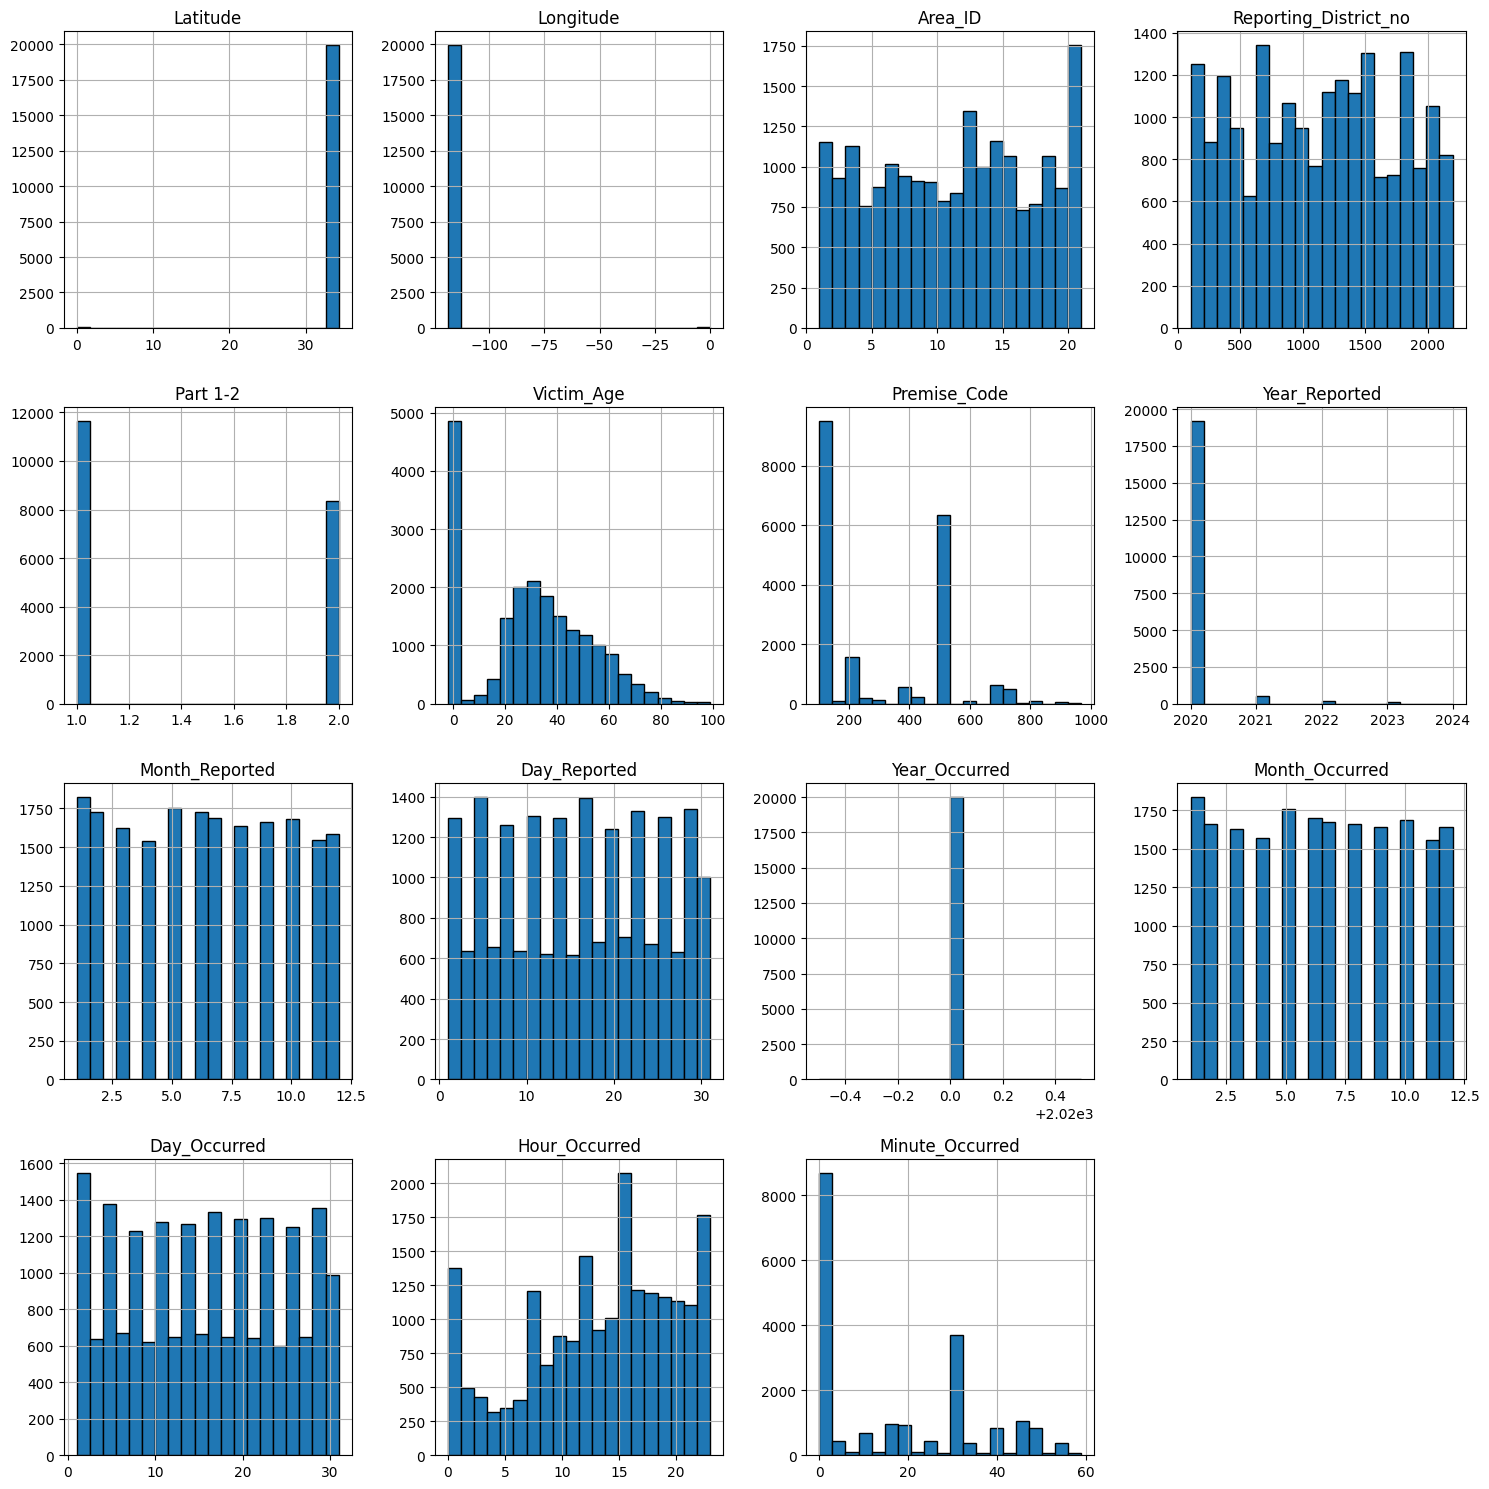

In [20]:
df[num_cols].hist(figsize=(15, 15), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()



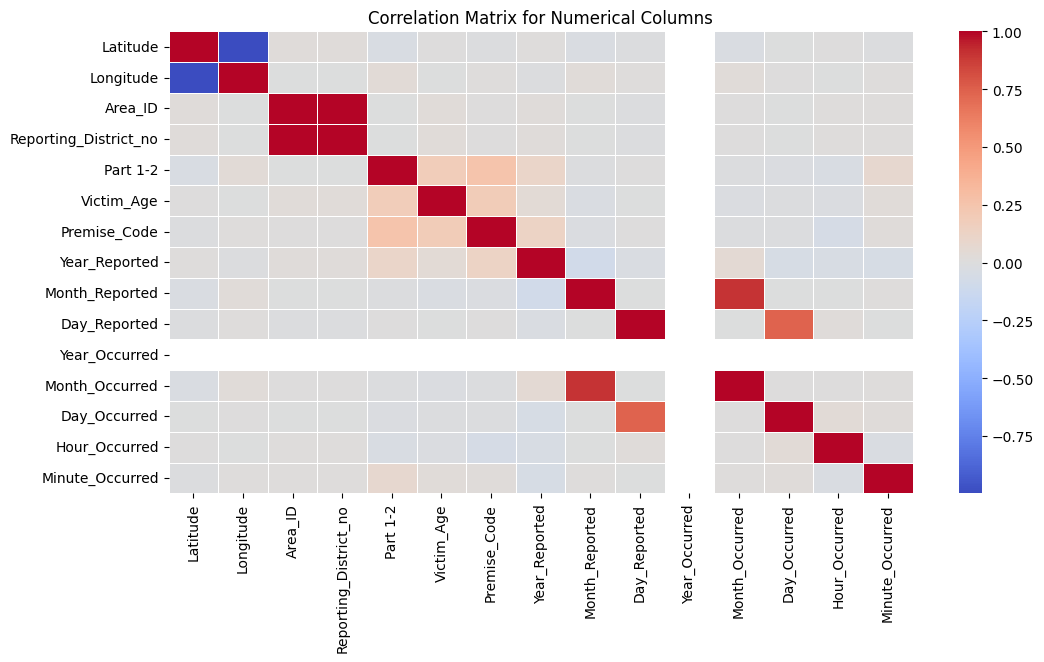

In [21]:
num_columns = ['Latitude', 'Longitude', 'Area_ID', 'Reporting_District_no', 'Part 1-2',
               'Victim_Age', 'Premise_Code', 'Year_Reported', 'Month_Reported',
               'Day_Reported', 'Year_Occurred', 'Month_Occurred', 'Day_Occurred',
               'Hour_Occurred', 'Minute_Occurred']

# Compute the correlation matrix using only numerical columns
correlation_matrix = df[num_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Columns')
plt.show()


/tmp/ipykernel_18/3917668077.py:13: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))
/tmp/ipykernel_18/3917668077.py:13: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))
/tmp/ipykernel_18/3917668077.py:13: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))
/tmp/ipykernel_18/3917668077.py:13: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))
/tmp/ipykernel_18/3917668077.py:13: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))
/tmp/ipykernel_18/3917668077.py:13: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))
/tmp/ipykernel_18/3917668077.py:13: RuntimeWarning: invalid value encountered in d

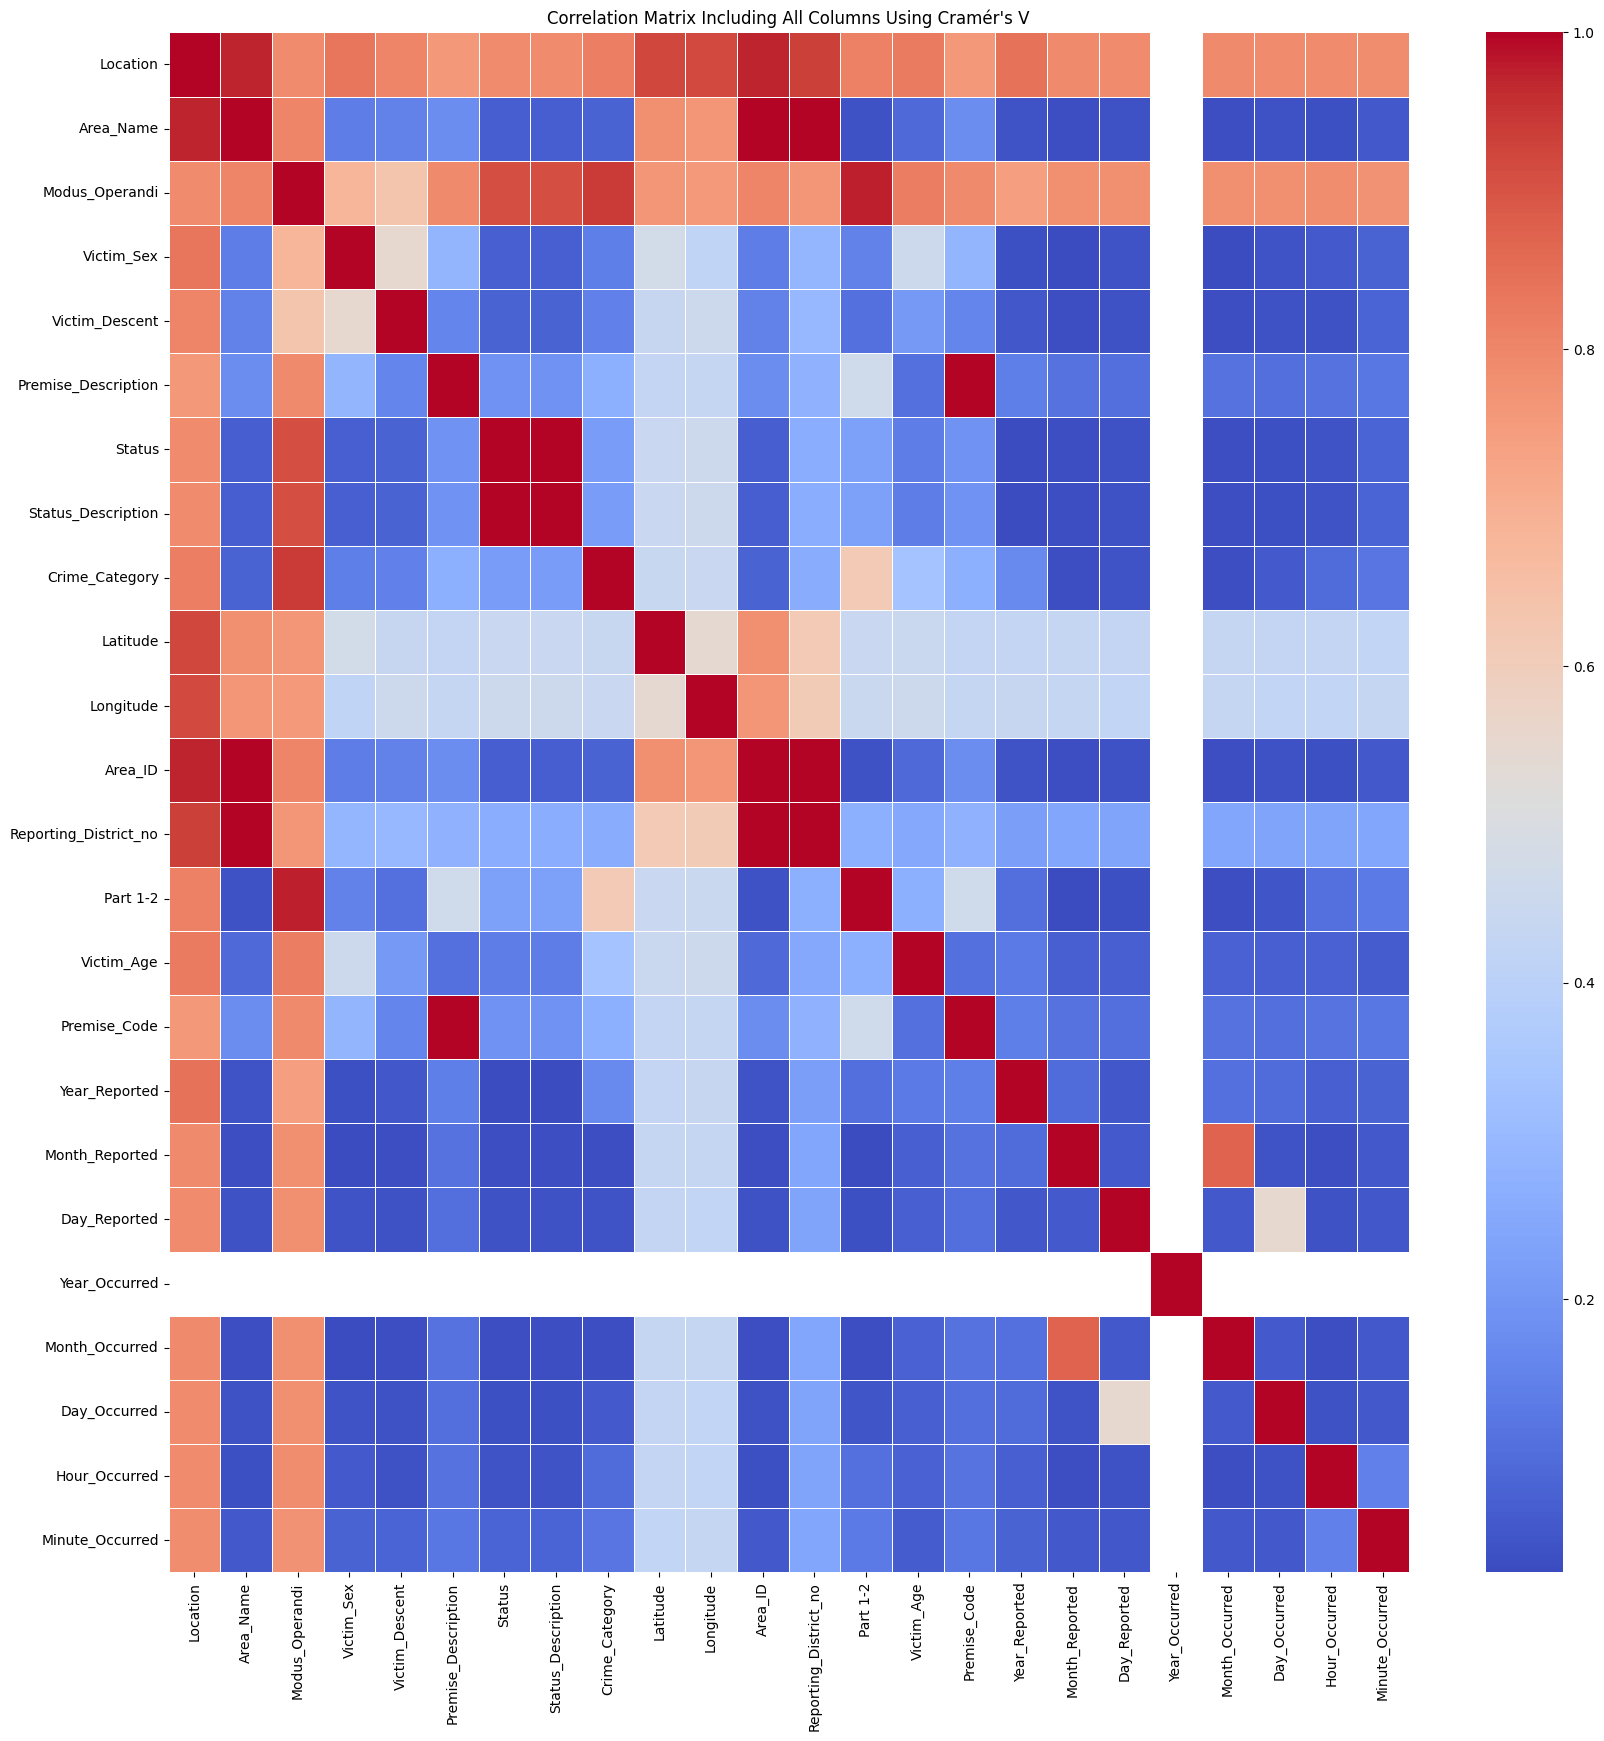

In [22]:
columns = ['Location', 'Area_Name', 'Modus_Operandi', 'Victim_Sex',
           'Victim_Descent', 'Premise_Description', 'Status', 'Status_Description',
           'Crime_Category', 'Latitude', 'Longitude', 'Area_ID', 'Reporting_District_no',
           'Part 1-2', 'Victim_Age', 'Premise_Code', 'Year_Reported', 'Month_Reported',
           'Day_Reported', 'Year_Occurred', 'Month_Occurred', 'Day_Occurred',
           'Hour_Occurred', 'Minute_Occurred']

# Function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# Create a matrix to store the correlation coefficients
cramers_v_matrix = pd.DataFrame(np.zeros((len(columns), len(columns))), index=columns, columns=columns)

# Calculate Cramér's V for each pair of columns
for col1 in columns:
    for col2 in columns:
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = 1.0
        else:
            cramers_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Plot the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(cramers_v_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Including All Columns Using Cramér\'s V')
plt.show()

We can see high correlation between:
* Part 1-2 and Modus Operandi
* Crime category and Modua Operandi
* Premise Code and Modus Operandi
* Crime category and Part 1-2

and so on...

In [23]:
df.describe()


,Latitude,Longitude,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Year_Reported,Month_Reported,Day_Reported,Year_Occurred,Month_Occurred,Day_Occurred,Hour_Occurred,Minute_Occurred
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.0,20000.000000,20000.00000,20000.000000,20000.000000
mean,33.940704,-117.893072,10.834250,1129.599200,1.418150,30.135000,297.176950,2020.061800,6.410050,15.791450,2020.0,6.432300,15.57010,13.352750,17.105350
std,2.126810,7.377726,6.033166,603.330519,0.493267,21.863645,212.007298,0.334942,3.452232,8.822174,0.0,3.459164,8.94346,6.463034,17.947364
min,0.000000,-118.663400,1.000000,101.000000,1.000000,-2.000000,101.000000,2020.000000,1.000000,1.000000,2020.0,1.000000,1.00000,0.000000,0.000000
25%,34.009200,-118.429700,6.000000,632.000000,1.000000,12.000000,101.000000,2020.000000,3.000000,8.000000,2020.0,3.000000,8.00000,9.000000,0.000000
50%,34.058700,-118.323000,11.000000,1162.000000,1.000000,31.000000,203.000000,2020.000000,6.000000,16.000000,2020.0,6.000000,16.00000,14.000000,15.000000
75%,34.165025,-118.274400,16.000000,1622.000000,2.000000,46.000000,501.000000,2020.000000,9.000000,23.000000,2020.0,9.000000,23.00000,19.000000,30.000000
max,34.328100,0.000000,21.000000,2197.000000,2.000000,99.000000,969.000000,2024.000000,12.000000,31.000000,2020.0,12.000000,31.00000,23.000000,59.000000


# Split Data

In [24]:
df = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/train.csv")
test_df = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/test.csv")

In [25]:
test_df.shape

(5000, 21)

In [26]:
# Define preprocessing function for date and time features
def preprocess_date_time(df):
    # Convert to datetime format
    df['Date_Reported'] = pd.to_datetime(df['Date_Reported'])
    df['Date_Occurred'] = pd.to_datetime(df['Date_Occurred'])

    # Extract year, month, day from Date_Reported
    df['Year_Reported'] = df['Date_Reported'].dt.year
    df['Month_Reported'] = df['Date_Reported'].dt.month
    df['Day_Reported'] = df['Date_Reported'].dt.day

    # Extract year, month, day, hour from Date_Occurred
    df['Year_Occurred'] = df['Date_Occurred'].dt.year
    df['Month_Occurred'] = df['Date_Occurred'].dt.month
    df['Day_Occurred'] = df['Date_Occurred'].dt.day
    df['Hour_Occurred'] = df['Time_Occurred'].fillna(0).astype(int) // 100
    df['Minute_Occurred'] = df['Time_Occurred'].fillna(0).astype(int)  - (df['Time_Occurred'].fillna(0).astype(int) // 100)*100

    # Drop unnecessary columns
    df.drop(columns=['Time_Occurred','Date_Reported','Date_Occurred'], inplace=True)

    return df


In [27]:
X = df.drop(columns="Crime_Category")

label_encoder = LabelEncoder()
y = df["Crime_Category"]

# y = df["Crime_Category"]

In [28]:

X.head()


,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,1.0,0385,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,1.0,0906 0352 0371 0446 1822 0344 0416 0417,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,2.0,0329 1202,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,1.0,0329 1300,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,1.0,0416 0945 1822 0400 0417 0344,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont


In [29]:
y.head()


0    Property Crimes
1    Property Crimes
2    Property Crimes
3    Property Crimes
4    Property Crimes
Name: Crime_Category, dtype: object

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape,test_df.shape,y_train.shape, y_test.shape

((15000, 21), (5000, 21), (5000, 21), (15000,), (5000,))

In [31]:
X_train = preprocess_date_time(X_train)
test_df = preprocess_date_time(test_df)
X_test = preprocess_date_time(X_test)
X_train.shape, X_test.shape,test_df.shape,y_train.shape, y_test.shape

/tmp/ipykernel_18/461817299.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date_Reported'] = pd.to_datetime(df['Date_Reported'])
/tmp/ipykernel_18/461817299.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date_Occurred'] = pd.to_datetime(df['Date_Occurred'])
/tmp/ipykernel_18/461817299.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date_Reported'] = pd.to_datetime(df['Date_Reported'])
/tmp/ipykernel_18/461817299.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is c

((15000, 26), (5000, 26), (5000, 26), (15000,), (5000,))

In [32]:
# X_train, mlb, imputer = preprocess_modus_operandi(X_train)
# X_test, _, _ = preprocess_modus_operandi(X_test, mlb, imputer)
# test_df, _, _ = preprocess_modus_operandi(test_df, mlb, imputer)
# X_train.shape, X_test.shape,y_train.shape, y_test.shape

In [33]:
X_train[:25]

,Location,Cross_Street,Latitude,Longitude,Area_ID,Area_Name,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Year_Reported,Month_Reported,Day_Reported,Year_Occurred,Month_Occurred,Day_Occurred,Hour_Occurred,Minute_Occurred
5514,7400 S SAN PEDRO ST,NaN,33.9722,-118.2696,12.0,77th Street,1259.0,1.0,0344,44.0,M,B,505.0,MOTEL,NaN,NaN,IC,Invest Cont,2020,8,31,2020,8,31,10,30
1266,600 S LOS ANGELES ST,NaN,34.0446,-118.2507,1.0,Central,164.0,1.0,1307 1822 0329 0352 1609 0344,23.0,M,B,101.0,STREET,NaN,NaN,IC,Invest Cont,2020,4,28,2020,4,27,20,0
5864,WESTERN,WILSHIRE,34.0617,-118.3091,20.0,Olympic,2022.0,1.0,1822 0334 0910,24.0,M,H,124.0,BUS STOP,207.0,OTHER KNIFE,IC,Invest Cont,2020,4,2,2020,4,2,17,40
15865,100 S BURLINGTON AV,NaN,34.0650,-118.2666,2.0,Rampart,236.0,1.0,NaN,0.0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,2020,3,25,2020,3,24,8,0
12892,21500 VENTURA BL,NaN,34.1681,-118.5987,21.0,Topanga,2187.0,2.0,0329,35.0,M,X,203.0,OTHER BUSINESS,NaN,NaN,IC,Invest Cont,2020,12,21,2020,12,20,8,0
5742,1200 W 8TH ST,NaN,33.7370,-118.3034,5.0,Harbor,562.0,2.0,0361 0913 0422 0447 1402,37.0,M,W,102.0,SIDEWALK,511.0,VERBAL THREAT,IC,Invest Cont,2020,4,3,2020,4,3,16,55
13653,17200 PRAIRIE ST,NaN,34.2395,-118.5084,17.0,Devonshire,1775.0,2.0,2038 0913 0555 1906 2003 2009,42.0,M,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,AA,Adult Arrest,2020,7,17,2020,7,15,21,47
3780,7100 HAZELTINE AV,NaN,34.1976,-118.4443,9.0,Van Nuys,915.0,2.0,2000 0416,45.0,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,2020,10,28,2020,10,28,14,30
12574,1200 S OLIVE ST,NaN,34.0395,-118.2622,1.0,Central,182.0,2.0,0329 1402 1822 2004 1414,0.0,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,AA,Adult Arrest,2020,4,9,2020,4,9,14,45
15733,1200 N CHEROKEE AV,NaN,34.0926,-118.3352,6.0,Hollywood,663.0,1.0,1601 1606 0344,31.0,M,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,2020,4,28,2020,4,28,12,0


In [34]:
X_train["Modus_Operandi"].nunique()

8006

In [35]:
# X_train[X_train["Premise_Description"].isnull()]
# X_train["Premise_Description"].nunique()

X_train.loc[X_train["Premise_Code"] == 418.0, "Premise_Description"] = "IMPUTE"
X_test.loc[X_test["Premise_Code"] == 418.0, "Premise_Description"] = "IMPUTE"
test_df.loc[test_df["Premise_Code"] == 418.0, "Premise_Description"] = "IMPUTE"


X_train[X_train["Premise_Code"] == 418.0]
# X_test[X_test["Premise_Code"] == 418.0]
# test_df[test_df["Premise_Code"] == 418.0]



,Location,Cross_Street,Latitude,Longitude,Area_ID,Area_Name,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Year_Reported,Month_Reported,Day_Reported,Year_Occurred,Month_Occurred,Day_Occurred,Hour_Occurred,Minute_Occurred
18204,8400 W 3RD ST,NaN,34.0730,-118.3731,7.0,Wilshire,722.0,1.0,2018 1822 0601 0446 0344 0325,38.0,M,H,418.0,IMPUTE,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,2020,6,7,2020,5,30,18,30
11029,2100 W SLAUSON AV,NaN,33.9891,-118.3158,12.0,77th Street,1233.0,2.0,1822 2018 0400 0444 0319,37.0,M,B,418.0,IMPUTE,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,2020,6,24,2020,6,24,14,20
15562,1700 S MAIN ST,NaN,33.9874,-118.4706,14.0,Pacific,1431.0,1.0,1501,63.0,M,W,418.0,IMPUTE,NaN,NaN,IC,Invest Cont,2020,11,7,2020,11,7,0,30
9884,5600 MELROSE AV,NaN,34.0853,-118.3277,6.0,Hollywood,676.0,2.0,0400 0444 1822,62.0,M,O,418.0,IMPUTE,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,2020,4,8,2020,4,7,10,0


In [36]:
# X_train[X_train["Weapon_Description"].isna() ]
# X_train["Premise_Code"].unique() == 404
X_train.loc[X_train["Weapon_Description"].isna(), ["Weapon_Description", "Weapon_Used_Code"]] = ["UNKNOWN", 404]
X_test.loc[X_test["Weapon_Description"].isna(), ["Weapon_Description", "Weapon_Used_Code"]] = ["UNKNOWN", 404]
test_df.loc[test_df["Weapon_Description"].isna(), ["Weapon_Description", "Weapon_Used_Code"]] = ["UNKNOWN", 404]
# test_df[test_df["Weapon_Description"].isna() ]

In [37]:
X_train.loc[X_train["Victim_Sex"].isna(), ["Victim_Sex", "Victim_Descent"]] = ["X", "X"]
X_test.loc[X_test["Victim_Sex"].isna(), ["Victim_Sex", "Victim_Descent"]] = ["X", "X"]
test_df.loc[test_df["Victim_Sex"].isna(), ["Victim_Sex", "Victim_Descent"]] = ["X", "X"]


In [38]:
X_train.shape, X_test.shape,test_df.shape,y_train.shape, y_test.shape

((15000, 26), (5000, 26), (5000, 26), (15000,), (5000,))

In [39]:
num_cols = X_train.select_dtypes(exclude="object").columns
num_cols


Index(['Latitude', 'Longitude', 'Area_ID', 'Reporting_District_no', 'Part 1-2',
       'Victim_Age', 'Premise_Code', 'Weapon_Used_Code', 'Year_Reported',
       'Month_Reported', 'Day_Reported', 'Year_Occurred', 'Month_Occurred',
       'Day_Occurred', 'Hour_Occurred', 'Minute_Occurred'],
      dtype='object')

In [40]:
num_cols.isnull().sum()

0

In [41]:
cat_cols = X_train.select_dtypes(include="object").columns
cat_cols


Index(['Location', 'Cross_Street', 'Area_Name', 'Modus_Operandi', 'Victim_Sex',
       'Victim_Descent', 'Premise_Description', 'Weapon_Description', 'Status',
       'Status_Description'],
      dtype='object')

In [42]:
X_train[num_cols].isnull().sum()

Latitude                 0
Longitude                0
Area_ID                  0
Reporting_District_no    0
Part 1-2                 0
Victim_Age               0
Premise_Code             0
Weapon_Used_Code         0
Year_Reported            0
Month_Reported           0
Day_Reported             0
Year_Occurred            0
Month_Occurred           0
Day_Occurred             0
Hour_Occurred            0
Minute_Occurred          0
dtype: int64

In [43]:
X_train[cat_cols].isnull().sum()

Location                   0
Cross_Street           12438
Area_Name                  0
Modus_Operandi          2084
Victim_Sex                 0
Victim_Descent             0
Premise_Description        0
Weapon_Description         0
Status                     0
Status_Description         0
dtype: int64

In [44]:
X_train.shape,X_test.shape,y_train.shape, y_test.shape

((15000, 26), (5000, 26), (15000,), (5000,))

In [45]:
X_train.drop(columns=['Cross_Street','Location'],inplace=True)
X_test.drop(columns=['Cross_Street','Location'],inplace=True)
test_df.drop(columns=['Cross_Street','Location'],inplace=True)
X_train.shape, X_test.shape,test_df.shape,y_train.shape, y_test.shape

((15000, 24), (5000, 24), (5000, 24), (15000,), (5000,))

In [46]:
X_train.shape, X_test.shape,test_df.shape,y_train.shape, y_test.shape

((15000, 24), (5000, 24), (5000, 24), (15000,), (5000,))

In [47]:
cat_cols = X_train.select_dtypes(include="object").columns
X_train[cat_cols].isnull().sum()

Area_Name                 0
Modus_Operandi         2084
Victim_Sex                0
Victim_Descent            0
Premise_Description       0
Weapon_Description        0
Status                    0
Status_Description        0
dtype: int64

In [48]:
cat_cols.nunique() + num_cols.nunique() 


24

In [49]:
num_cols = X_train.select_dtypes(exclude="object").columns
num_cols


Index(['Latitude', 'Longitude', 'Area_ID', 'Reporting_District_no', 'Part 1-2',
       'Victim_Age', 'Premise_Code', 'Weapon_Used_Code', 'Year_Reported',
       'Month_Reported', 'Day_Reported', 'Year_Occurred', 'Month_Occurred',
       'Day_Occurred', 'Hour_Occurred', 'Minute_Occurred'],
      dtype='object')

In [50]:
cat_pipeline =  Pipeline([
    ("cat_imputer", SimpleImputer(strategy="most_frequent")),
    ("ord_encoder", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))
])
cat_pipeline

Pipeline(steps=[('cat_imputer', SimpleImputer(strategy='most_frequent')),
                ('ord_encoder',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=-1))])

In [51]:
class TfidfVectorizerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.tfidf = TfidfVectorizer()
        
    def fit(self, X, y=None):
        self.tfidf.fit(X.ravel())  # Flatten to ensure it's a 1D array of strings
        return self
    
    def transform(self, X, y=None):
        return self.tfidf.transform(X.ravel()).toarray()  # 

In [52]:
num_pipeline = Pipeline([
    ("num_imputer", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler())  
])
num_pipeline

Pipeline(steps=[('num_imputer', SimpleImputer(strategy='median')),
                ('scaler', MinMaxScaler())])

In [53]:
preprocessor = ColumnTransformer([
    ("modus", Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='')),
#         ('binarizer', LabelBinarizerTransformer())
        ('tfidf', TfidfVectorizerTransformer())
    ]), ['Modus_Operandi']),

    ("num", num_pipeline, num_cols),
    ("cat", cat_pipeline, ["Victim_Sex", "Victim_Descent", 
                           "Premise_Description", "Weapon_Description",
                           "Area_Name", "Status", "Status_Description"])
])

preprocessor
# ,"Cross_Street","Weapon_Description"

ColumnTransformer(transformers=[('modus',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='',
                                                                strategy='constant')),
                                                 ('tfidf',
                                                  TfidfVectorizerTransformer())]),
                                 ['Modus_Operandi']),
                                ('num',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', MinMaxScaler())]),
                                 Index(['Latitude', 'Longitude', 'Area_ID', 'Reporting_District_no', 'Part 1-...
       'Day_Occurred', 'Hour_Occurred', 'Minute_Occurred'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ord_encoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 ['Victim_Sex', 'Victim_Descent',
                                  'Premise_Description', 'Weapon_Description',
                                  'Area_Name', 'Status',
                                  'Status_Description'])])

# Build Models

## Logistic Regression Model


In [54]:
pipelineLR = Pipeline([
    ("preprocessor", preprocessor),
    ("feature_selection", SelectKBest(score_func=f_classif, k=425)),  #  , k=200
    ("classifier", LogisticRegression(max_iter=10000))
])

# Fit the pipeline to the training data
pipelineLR.fit(X_train.copy(), y_train.copy())

# Predict and evaluate the model
y_predLR = pipelineLR.predict(X_test.copy())

# Calculate accuracy
accuracyLR = accuracy_score(y_test, y_predLR)
print("Logistic Regression Test set accuracy: ", accuracyLR)


/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [468] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Logistic Regression Test set accuracy:  0.9434


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
# lr_param_grid = {
#     'feature_selection__k': [350,375,400,425,450]
# }

# # Perform RandomizedSearchCV
# grid_search_lr = GridSearchCV(estimator=pipelineLR, param_grid=lr_param_grid, cv=3, n_jobs=-1, scoring='accuracy', verbose=1)


# # Fit the grid search to the training data
# grid_search_lr.fit(X_train.copy(), y_train.copy())

# # Get the best model from the grid search
# best_lr_model = grid_search_lr.best_estimator_

# # Predict on the test set
# y_predLR = best_lr_model.predict(X_test.copy())

# # Calculate and print accuracy
# accuracyLR = accuracy_score(y_test, y_predLR)
# print("Logistic Regression Test set accuracy: ", accuracyLR)


In [56]:
# print("Best parameters found: ", grid_search_lr.best_params_)
# print("Best cross-validation accuracy: {:.2f}".format(grid_search_lr.best_score_))


In [57]:
precisionLR = precision_score(y_test, y_predLR, average='weighted')
print(f"Precision: {precisionLR}")

recallLR = recall_score(y_test, y_predLR, average='weighted')
print(f"Recall: {recallLR}")

f1LR = f1_score(y_test, y_predLR, average='weighted')
print(f"F1 Score: {f1LR}")

conf_matrixLR = confusion_matrix(y_test, y_predLR)
print(f"Confusion Matrix:\n{conf_matrixLR}")

class_reportLR = classification_report(y_test, y_predLR)
print(f"Classification Report:\n{class_reportLR}")


Precision: 0.9410643890284344
Recall: 0.9434
F1 Score: 0.9412636501494868
Confusion Matrix:
[[  19    3    1    0    1   17]
 [   4  389    9    3   13   42]
 [   1   21  310    3    0    2]
 [   0   20    6    7    4    5]
 [   1   11    1    0 2830   41]
 [   7   33    0    0   34 1162]]
Classification Report:
                               precision    recall  f1-score   support

       Crimes against Persons       0.59      0.46      0.52        41
  Crimes against Public Order       0.82      0.85      0.83       460
Fraud and White-Collar Crimes       0.95      0.92      0.93       337
                 Other Crimes       0.54      0.17      0.25        42
              Property Crimes       0.98      0.98      0.98      2884
               Violent Crimes       0.92      0.94      0.93      1236

                     accuracy                           0.94      5000
                    macro avg       0.80      0.72      0.74      5000
                 weighted avg       0.94     

In [58]:
print("The validation test accuracy score is 0.9434 and the submission score is 0.867")

The validation test accuracy score is 0.9434 and the submission score is 0.867


## DecisionTreeClassifier Model

In [59]:
pipelineDT = Pipeline([
    ("preprocessor", preprocessor),
    ("feature_selection", SelectKBest(score_func=f_classif,k=270)),  #,k=500
    ("classifier", DecisionTreeClassifier())
])

param_grid = {
    'feature_selection__k': [270,275,278,270,280,285,286,287,290]
}
pipelineDT

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('modus',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='',
                                                                                 strategy='constant')),
                                                                  ('tfidf',
                                                                   TfidfVectorizerTransformer())]),
                                                  ['Modus_Operandi']),
                                                 ('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Latitude', 'Longitude', 'Area_ID'...
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord_encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Victim_Sex',
                                                   'Victim_Descent',
                                                   'Premise_Description',
                                                   'Weapon_Description',
                                                   'Area_Name', 'Status',
                                                   'Status_Description'])])),
                ('feature_selection', SelectKBest(k=270)),
                ('classifier', DecisionTreeClassifier())])

In [60]:
pipelineDT.fit(X_train.copy(), y_train.copy())
y_predCD = pipelineDT.predict(test_df)
# accuracyFB = accuracy_score(y_test, y_predCD)
# accuracyFB

/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [468] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [61]:
grid_search_dt = GridSearchCV(pipelineDT, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_dt.fit(X_train.copy(), y_train.copy())



/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [452] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [453] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [446] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/l

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('modus',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='',
                                                                                                        strategy='constant')),
                                                                                         ('tfidf',
                                                                                          TfidfVectorizerTransformer())]),
                                                                         ['Modus_Operandi']),
                                                                        ('num',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         Index(['Lat...
                                                                                          OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                         unknown_value=-1))]),
                                                                         ['Victim_Sex',
                                                                          'Victim_Descent',
                                                                          'Premise_Description',
                                                                          'Weapon_Description',
                                                                          'Area_Name',
                                                                          'Status',
                                                                          'Status_Description'])])),
                                       ('feature_selection',
                                        SelectKBest(k=270)),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'feature_selection__k': [270, 275, 278, 270, 280, 285,
                                                  286, 287, 290]},
             scoring='accuracy')

In [62]:
 print("Best parameters found: ", grid_search_dt.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search_dt.best_score_))


Best parameters found:  {'feature_selection__k': 270}
Best cross-validation accuracy: 0.93


In [63]:
y_pred = grid_search_dt.best_estimator_.predict(X_test.copy())
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9322

In [64]:
precisionRF = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precisionRF}")

recallRF = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recallRF}")

f1RF = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1RF}")

conf_matrixRF = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrixRF}")

class_reportRF = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_reportRF}")


Precision: 0.9308464799264744
Recall: 0.9322
F1 Score: 0.9311796486204472
Confusion Matrix:
[[  29    1    1    0    0   10]
 [   6  354   28    6   16   50]
 [   1   24  306    4    2    0]
 [   0   20    9    8    4    1]
 [   0    7    3    3 2832   39]
 [  20   41    0    2   41 1132]]
Classification Report:
                               precision    recall  f1-score   support

       Crimes against Persons       0.52      0.71      0.60        41
  Crimes against Public Order       0.79      0.77      0.78       460
Fraud and White-Collar Crimes       0.88      0.91      0.89       337
                 Other Crimes       0.35      0.19      0.25        42
              Property Crimes       0.98      0.98      0.98      2884
               Violent Crimes       0.92      0.92      0.92      1236

                     accuracy                           0.93      5000
                    macro avg       0.74      0.75      0.74      5000
                 weighted avg       0.93     

In [65]:
y_pred = grid_search_dt.best_estimator_.predict(test_df.copy())

In [66]:
print("The validation test accuracy score is 0.93 and the submission score is 0.92740")

The validation test accuracy score is 0.93 and the submission score is 0.92740


## Random Forest Classifier

In [67]:
pipelineRF = Pipeline([
    ("preprocessor", preprocessor),
   ("feature_selection", SelectKBest(score_func=f_classif)), #  , k=33
     ("classifier", RandomForestClassifier())
])

param_grid = {
    'feature_selection__k': [220,221,222,223,224,225,226,227,228,229,230,240]
}

pipelineRF



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('modus',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='',
                                                                                 strategy='constant')),
                                                                  ('tfidf',
                                                                   TfidfVectorizerTransformer())]),
                                                  ['Modus_Operandi']),
                                                 ('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Latitude', 'Longitude', 'Area_ID'...
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord_encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Victim_Sex',
                                                   'Victim_Descent',
                                                   'Premise_Description',
                                                   'Weapon_Description',
                                                   'Area_Name', 'Status',
                                                   'Status_Description'])])),
                ('feature_selection', SelectKBest()),
                ('classifier', RandomForestClassifier())])

In [68]:
grid_search_rf = GridSearchCV(pipelineRF, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_rf.fit(X_train.copy(), y_train.copy())

best_params = grid_search_rf.best_params_
print("Best parameters:", best_params)

y_predRF = grid_search_rf.best_estimator_.predict(X_test.copy())

accuracyRF = accuracy_score(y_test, y_predRF)
print(f"Accuracy: {accuracyRF}")


/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [446] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [452] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [456] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/l

Best parameters: {'feature_selection__k': 220}
Accuracy: 0.9532


In [69]:
y_predRF = grid_search_rf.best_estimator_.predict(X_test.copy())

In [70]:
accuracyRF = accuracy_score(y_test.copy(), y_predRF)
print("Random Forest Test set accuracy: ", accuracyRF)

Random Forest Test set accuracy:  0.9532


In [71]:
precisionRF = precision_score(y_test, y_predRF, average='weighted')
print(f"Precision: {precisionRF}")

recallRF = recall_score(y_test, y_predRF, average='weighted')
print(f"Recall: {recallRF}")

f1RF = f1_score(y_test, y_predRF, average='weighted')
print(f"F1 Score: {f1RF}")

conf_matrixRF = confusion_matrix(y_test, y_predRF)
print(f"Confusion Matrix:\n{conf_matrixRF}")

class_reportRF = classification_report(y_test, y_predRF)
print(f"Classification Report:\n{class_reportRF}")


Precision: 0.9501142529885367
Recall: 0.9532
F1 Score: 0.9500521967443718
Confusion Matrix:
[[  13    5    0    0    1   22]
 [   2  383    9    3   12   51]
 [   0   18  317    0    2    0]
 [   0   21    6    7    8    0]
 [   0    1    2    0 2846   35]
 [   9   17    0    1    9 1200]]
Classification Report:
                               precision    recall  f1-score   support

       Crimes against Persons       0.54      0.32      0.40        41
  Crimes against Public Order       0.86      0.83      0.85       460
Fraud and White-Collar Crimes       0.95      0.94      0.94       337
                 Other Crimes       0.64      0.17      0.26        42
              Property Crimes       0.99      0.99      0.99      2884
               Violent Crimes       0.92      0.97      0.94      1236

                     accuracy                           0.95      5000
                    macro avg       0.82      0.70      0.73      5000
                 weighted avg       0.95     

In [72]:
y_predRF = grid_search_rf.best_estimator_.predict(test_df.copy())

In [73]:
print("The validation test accuracy score is 0.9506 and the submission score is 0.95180")

The validation test accuracy score is 0.9506 and the submission score is 0.95180


## XGB Classifier

In [74]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train.copy())
y_test_encoded = label_encoder.transform(y_test.copy())


In [75]:
pipelineXGB = Pipeline([
    ("preprocessor", preprocessor),
    ("feature_selection", SelectKBest(score_func=f_classif)),  #  , k=22
    ("classifier", XGBClassifier(eval_metric='mlogloss', use_label_encoder=False))
])
xgb_refined_params = {
    'feature_selection__k': [195,200,201,202,203,204, 205,210]
}


pipelineXGB

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('modus',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='',
                                                                                 strategy='constant')),
                                                                  ('tfidf',
                                                                   TfidfVectorizerTransformer())]),
                                                  ['Modus_Operandi']),
                                                 ('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Latitude', 'Longitude', 'Area_ID'...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [76]:
grid_search_xgb_refined = RandomizedSearchCV(estimator=pipelineXGB, param_distributions=xgb_refined_params, cv=3, n_jobs=-1, random_state=42, n_iter=100
)


grid_search_xgb_refined.fit(X_train.copy(), y_train_encoded)

best_xgb_refined_model = grid_search_xgb_refined.best_estimator_

y_predXGB = best_xgb_refined_model.predict(X_test.copy())

y_predXGB_decoded = label_encoder.inverse_transform(y_predXGB)

print("Best parameters found: ", grid_search_xgb_refined.best_params_)

accuracy = accuracy_score(y_test, y_predXGB_decoded)
print(f"Accuracy: {accuracy}")


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [442] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [429] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / m

Best parameters found:  {'feature_selection__k': 204}
Accuracy: 0.9596


In [77]:
y_predXGB = best_xgb_refined_model.predict(X_test.copy())

# Decode the predicted labels back to the original labels
y_predXGB_decoded = label_encoder.inverse_transform(y_predXGB)

# Calculate accuracy
accuracyXGB = accuracy_score(y_test, y_predXGB_decoded)
print("XGBoost Test set accuracy: ", accuracyXGB)


XGBoost Test set accuracy:  0.9596


In [78]:
precisionXGB = precision_score(y_test, y_predXGB_decoded, average='weighted')
print(f"Precision: {precisionXGB}")

recallXGB = recall_score(y_test, y_predXGB_decoded, average='weighted')
print(f"Recall: {recallXGB}")

f1XGB = f1_score(y_test, y_predXGB_decoded, average='weighted')
print(f"F1 Score: {f1XGB}")

conf_matrixXGB = confusion_matrix(y_test, y_predXGB_decoded)
print(f"Confusion Matrix:\n{conf_matrixXGB}")

class_reportXGB = classification_report(y_test, y_predXGB_decoded)
print(f"Classification Report:\n{class_reportXGB}")


Precision: 0.9581826529574697
Recall: 0.9596
F1 Score: 0.958502677929621
Confusion Matrix:
[[  32    0    0    0    0    9]
 [   3  407    4    7    9   30]
 [   1   15  316    5    0    0]
 [   0   25    5    9    3    0]
 [   0    5    1    0 2846   32]
 [  11   23    0    0   14 1188]]
Classification Report:
                               precision    recall  f1-score   support

       Crimes against Persons       0.68      0.78      0.73        41
  Crimes against Public Order       0.86      0.88      0.87       460
Fraud and White-Collar Crimes       0.97      0.94      0.95       337
                 Other Crimes       0.43      0.21      0.29        42
              Property Crimes       0.99      0.99      0.99      2884
               Violent Crimes       0.94      0.96      0.95      1236

                     accuracy                           0.96      5000
                    macro avg       0.81      0.79      0.80      5000
                 weighted avg       0.96      

In [79]:
y_predXGB = best_xgb_refined_model.predict(test_df.copy())

# Decode the predicted labels back to the original labels
y_predXGB_decoded = label_encoder.inverse_transform(y_predXGB)

In [80]:
submission = pd.DataFrame({"ID": np.arange(1, 5001),
                             "Crime_Category": y_predXGB_decoded,
                          }
                         )
submission.head()
submission.to_csv('/kaggle/working/submission.csv', index=False)


In [81]:
print("The validation test accuracy score is 0.9596 and the submission score is 0.94900")

The validation test accuracy score is 0.9596 and the submission score is 0.94900


## Gradient Boosting

In [82]:
pipelineGB = Pipeline([
    ("preprocessor", preprocessor),
    ("feature_selection", SelectKBest(score_func=f_classif, k=10)),
    ("classifier", GradientBoostingClassifier())
])
pipelineGB

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('modus',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='',
                                                                                 strategy='constant')),
                                                                  ('tfidf',
                                                                   TfidfVectorizerTransformer())]),
                                                  ['Modus_Operandi']),
                                                 ('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Latitude', 'Longitude', 'Area_ID'...
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord_encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Victim_Sex',
                                                   'Victim_Descent',
                                                   'Premise_Description',
                                                   'Weapon_Description',
                                                   'Area_Name', 'Status',
                                                   'Status_Description'])])),
                ('feature_selection', SelectKBest()),
                ('classifier', GradientBoostingClassifier())])

In [83]:
gb_param_grid = {
    'feature_selection__k': [200,201,202,203,204,205,206,207,208,209,210]
}

grid_search_gb = GridSearchCV(estimator=pipelineGB,param_grid=gb_param_grid,cv=3,n_jobs=-1)
grid_search_gb.fit(X_train.copy(), y_train.copy())

# Predict and evaluate the model on the test set
y_predGB = grid_search_gb.predict(X_test.copy())
accuracyGB = accuracy_score(y_test, y_predGB)
print("Gradient Boosting Test set accuracy: ", accuracyGB)

# Print the best parameters found by GridSearchCV
print("Best parameters found: ", grid_search_gb.best_params_)



/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [429] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [442] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [430] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/conda/l

Gradient Boosting Test set accuracy:  0.9488
Best parameters found:  {'feature_selection__k': 206}


In [84]:
precisionGB = precision_score(y_test, y_predGB, average='weighted')
print(f"Precision: {precisionGB}")

recallGB = recall_score(y_test, y_predGB, average='weighted')
print(f"Recall: {recallGB}")

f1GB = f1_score(y_test, y_predGB, average='weighted')
print(f"F1 Score: {f1GB}")

conf_matrixGB = confusion_matrix(y_test, y_predGB)
print(f"Confusion Matrix:\n{conf_matrixGB}")

class_reportGB = classification_report(y_test, y_predGB)
print(f"Classification Report:\n{class_reportGB}")

print("Best parameters found: ", grid_search_gb.best_params_)

Precision: 0.947468079658751
Recall: 0.9488
F1 Score: 0.9478984239018015
Confusion Matrix:
[[  24    2    1    1    0   13]
 [   6  385    3   11   12   43]
 [   0   26  308    3    0    0]
 [   0   30    2    8    2    0]
 [   2    4    0    2 2844   32]
 [  12   22    0    1   26 1175]]
Classification Report:
                               precision    recall  f1-score   support

       Crimes against Persons       0.55      0.59      0.56        41
  Crimes against Public Order       0.82      0.84      0.83       460
Fraud and White-Collar Crimes       0.98      0.91      0.95       337
                 Other Crimes       0.31      0.19      0.24        42
              Property Crimes       0.99      0.99      0.99      2884
               Violent Crimes       0.93      0.95      0.94      1236

                     accuracy                           0.95      5000
                    macro avg       0.76      0.74      0.75      5000
                 weighted avg       0.95      

# Compare Models

In [85]:
# LR

y_predLR = pipelineLR.predict(X_test.copy())
accuracyLR = accuracy_score(y_test, y_predLR)
precisionLR = precision_score(y_test, y_predLR, average='weighted')
recallLR = recall_score(y_test, y_predLR, average='weighted')
f1LR = f1_score(y_test, y_predLR, average='weighted')


In [86]:
# DT

y_predDT = grid_search_dt.best_estimator_.predict(X_test.copy())
accuracyDT = accuracy_score(y_test, y_predDT)
precisionDT = precision_score(y_test, y_predDT, average='weighted')
recallDT = recall_score(y_test, y_predDT, average='weighted')
f1DT = f1_score(y_test, y_predDT, average='weighted')


In [87]:
# RF

y_predRF = grid_search_rf.best_estimator_.predict(X_test.copy())
accuracyRF = accuracy_score(y_test, y_predRF)
precisionRF = precision_score(y_test, y_predRF, average='weighted')
recallRF = recall_score(y_test, y_predRF, average='weighted')
f1RF = f1_score(y_test, y_predRF, average='weighted')


In [88]:
# GB

y_predGB = grid_search_gb.best_estimator_.predict(X_test.copy())
accuracyGB = accuracy_score(y_test, y_predGB)
precisionGB = precision_score(y_test, y_predGB, average='weighted')
recallGB = recall_score(y_test, y_predGB, average='weighted')
f1GB = f1_score(y_test, y_predGB, average='weighted')


In [89]:
# XGB

precisionXGB = precision_score(y_test, y_predXGB_decoded, average='weighted')
print(f"Precision: {precisionXGB}")

recallXGB = recall_score(y_test, y_predXGB_decoded, average='weighted')
print(f"Recall: {recallXGB}")

f1XGB = f1_score(y_test, y_predXGB_decoded, average='weighted')
print(f"F1 Score: {f1XGB}")

accuracyXGB = accuracy_score(y_test, y_predXGB_decoded)
print("Accuracy: ", accuracyXGB)

Precision: 0.39271879271240157
Recall: 0.3968
F1 Score: 0.3947461507194618
Accuracy:  0.3968


In [90]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boosting", "XGBoost"],
    "Accuracy": [accuracyLR, accuracyDT, accuracyRF, accuracyGB, accuracyXGB],
    "Precision": [precisionLR, precisionDT, precisionRF, precisionGB, precisionXGB],
    "Recall": [recallLR, recallDT, recallRF, recallGB, recallXGB],
    "F1 Score": [f1LR, f1DT, f1RF, f1GB, f1XGB]
})

print(results)


                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression    0.9434   0.941064  0.9434  0.941264
1        Decision Tree    0.9322   0.930846  0.9322  0.931180
2        Random Forest    0.9532   0.950114  0.9532  0.950052
3    Gradient Boosting    0.9488   0.947468  0.9488  0.947898
4              XGBoost    0.3968   0.392719  0.3968  0.394746


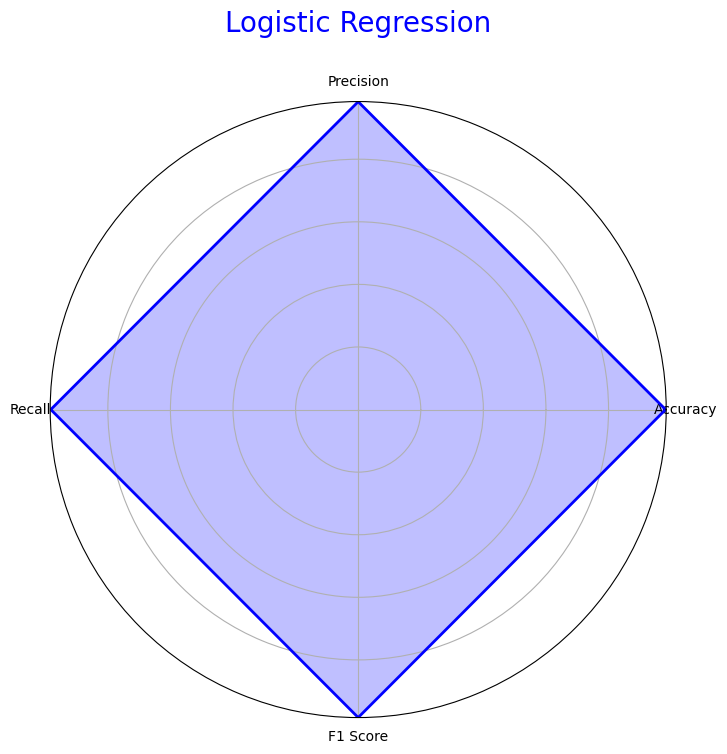

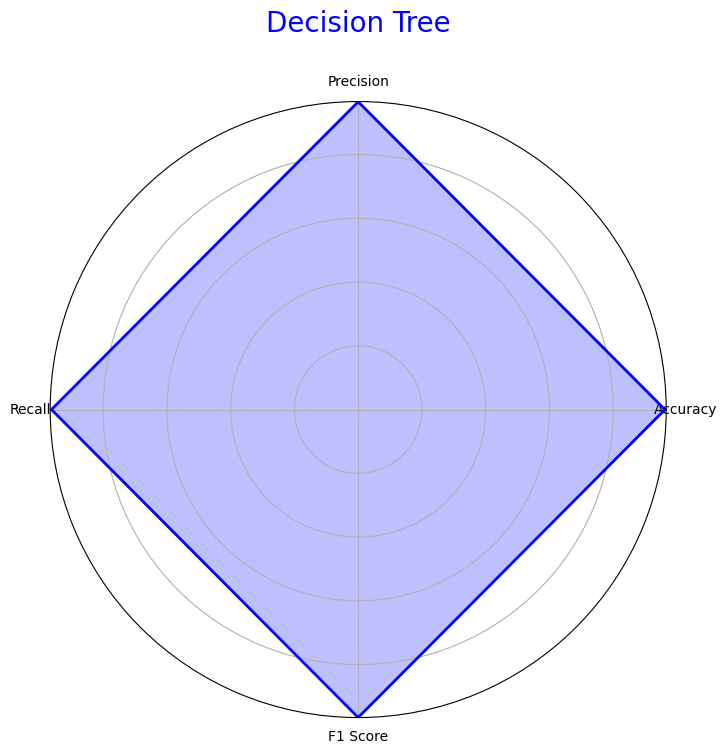

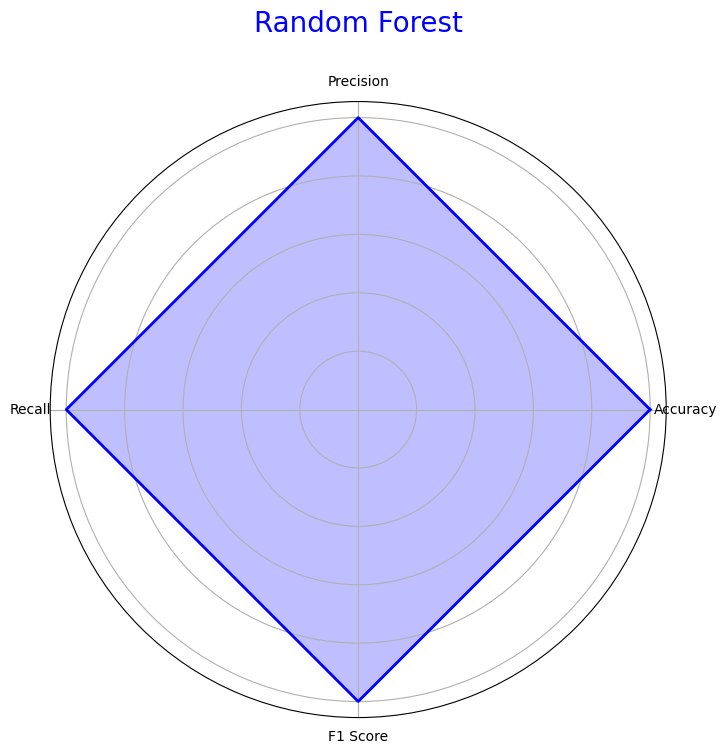

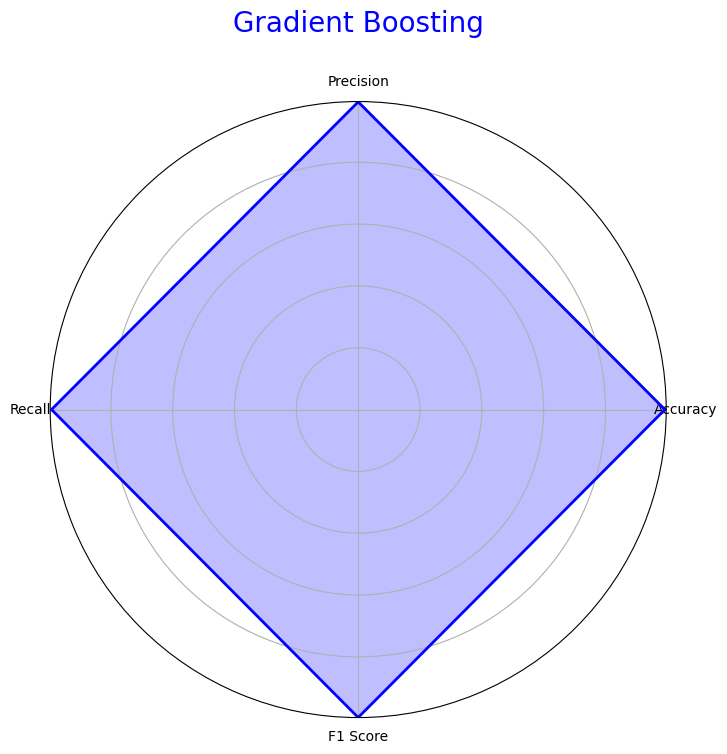

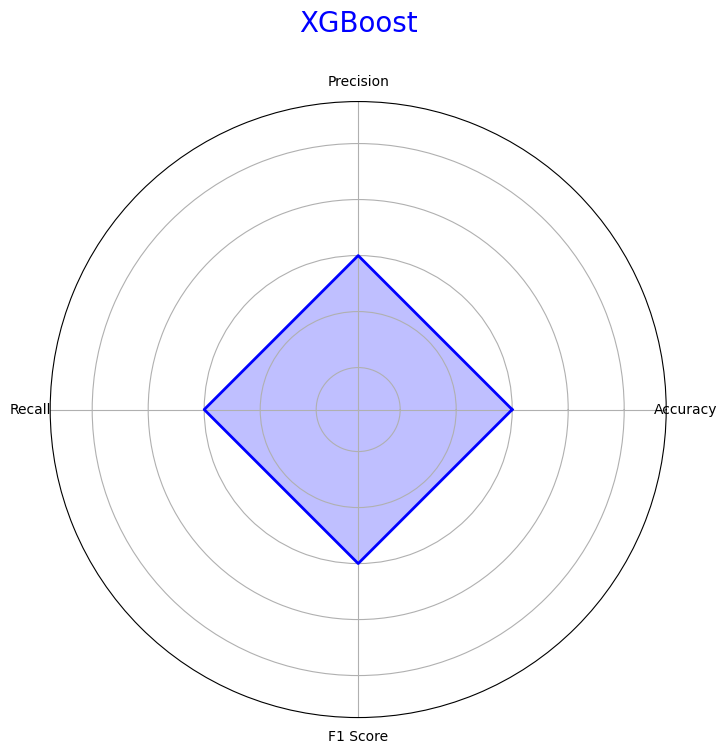

In [91]:
def plot_radar(data, labels, title):
    # Number of variables we're plotting.
    num_vars = len(labels)

    # Split the circle into even parts and save the angles
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # The radar chart is a circle, so we need to "complete the loop"
    # and append the start value to the end.
    data += data[:1]
    angles += angles[:1]

    # Draw the radar chart
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angles, data, color='blue', alpha=0.25)
    ax.plot(angles, data, color='blue', linewidth=2)

    # Draw labels on the outer ring
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

    # Set the title
    ax.set_title(title, size=20, color='blue', y=1.1)
    plt.show()

# Prepare the data
models = ["Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boosting", "XGBoost"]
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

# Normalize the data for better comparison
normalized_results = results.copy()
normalized_results[metrics] = results[metrics].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Plot radar charts for each model
for i, model in enumerate(models):
    data = normalized_results[normalized_results['Model'] == model][metrics].values.flatten().tolist()
    plot_radar(data, metrics, model)
